In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore') # تجاهل الرسايل

In [2]:
data = pd.read_csv('car_price_prediction.csv')
data.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
data.shape

(19237, 18)

In [5]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [6]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
# لمعرفه عدد التكرارات في الداتا
data.duplicated().sum()

313

In [8]:
# لمسح التكرارات في الداتا
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(18924, 18)

In [11]:
data.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


# **Analysis**

In [12]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [13]:
# لمعرفه انواع السيارات في هذا الصف
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [14]:
# بيجيب كل البيانات الغير مكرره في الداتا
for col in data.columns:
  print(f"{col} <<:>> {data[col].unique()}")

ID <<:>> [45654403 44731507 45774419 ... 45804997 45793526 45813273]
Price <<:>> [13328 16621  8467 ... 56814 63886 22075]
Levy <<:>> ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408'

In [15]:
# بيجيب عدد البيانات الفريده في الداتا
for col in data.columns:
  print(f"{col} <<:>> {data[col].nunique()}")

ID <<:>> 18924
Price <<:>> 2315
Levy <<:>> 559
Manufacturer <<:>> 65
Model <<:>> 1590
Prod. year <<:>> 54
Category <<:>> 11
Leather interior <<:>> 2
Fuel type <<:>> 7
Engine volume <<:>> 107
Mileage <<:>> 7687
Cylinders <<:>> 13
Gear box type <<:>> 4
Drive wheels <<:>> 3
Doors <<:>> 3
Wheel <<:>> 2
Color <<:>> 16
Airbags <<:>> 17


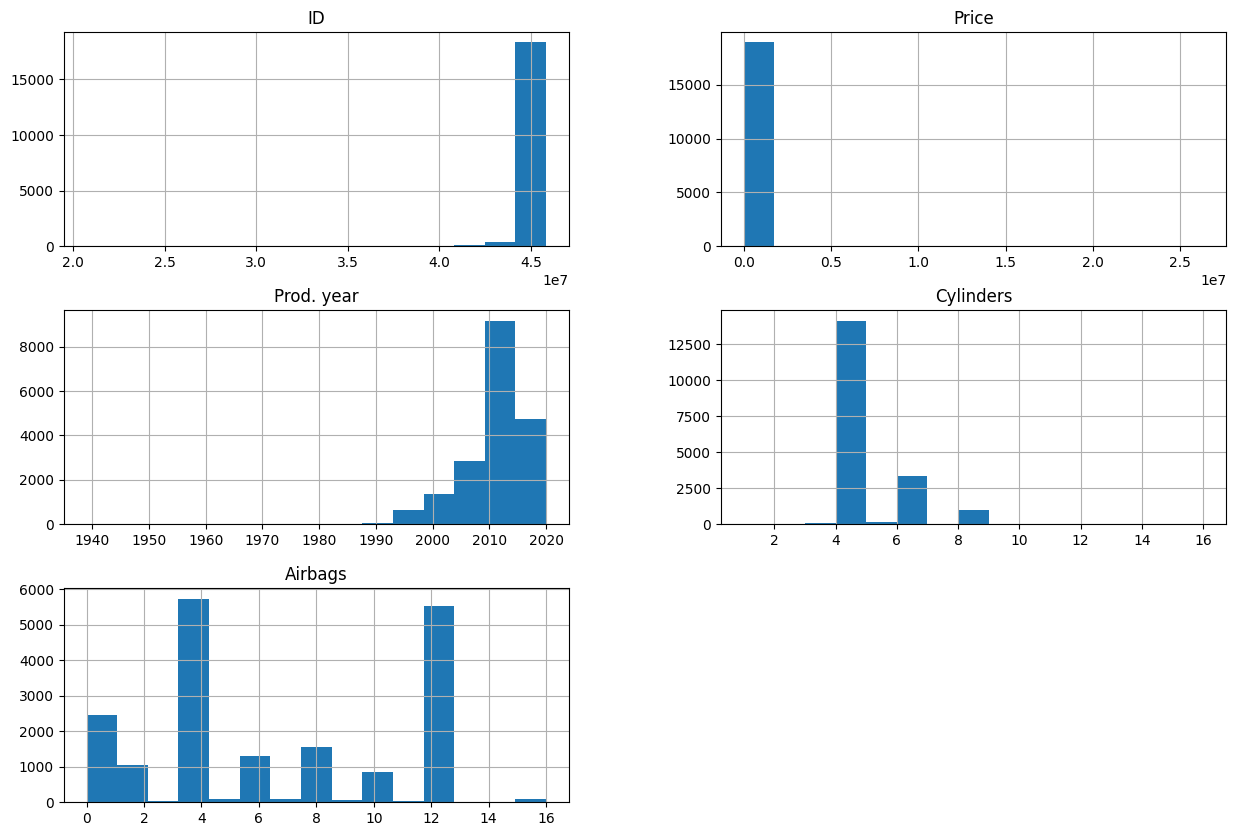

In [16]:
data.hist(bins=15,figsize=(15,10))
plt.show()

In [17]:
# بجيب اعلي 10 انواع سيارات ليها عدد ارقام في الداتا
top_10_cars=data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top_10_cars

,count
Manufacturer,
HYUNDAI,3729
TOYOTA,3606
MERCEDES-BENZ,2043
FORD,1088
CHEVROLET,1047
BMW,1036
HONDA,960
LEXUS,927
NISSAN,645


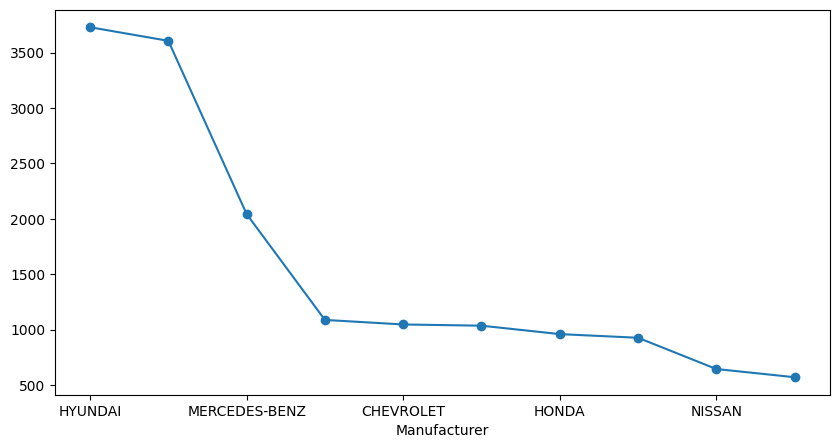

In [64]:
top_10_cars.plot(figsize=(10,5),marker='o')
plt.show()

In [19]:
# بجيب متوسط اسعار العربيات
top_10_mean_prices=[data[data["Manufacturer"] == i]['Price'].mean() for i in list(top_10_cars.index)]
top_10_mean_prices

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

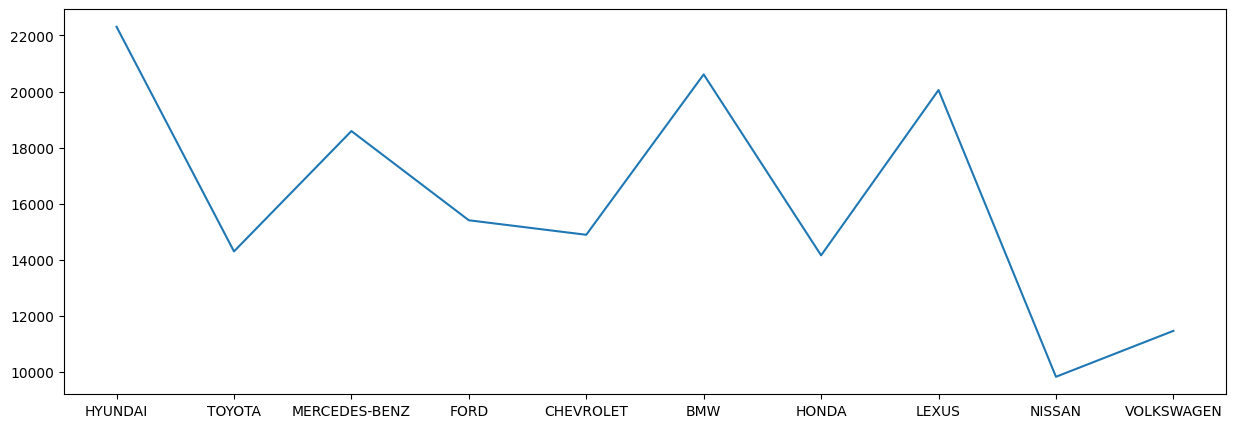

In [20]:
# رسم لتوضيع العلاقه بين متوسط الاسعار واعلي 10 انواع سيارات
plt.figure(figsize=(15,5))
plt.plot(top_10_cars.index,top_10_mean_prices)
plt.show()

In [21]:
# Correlation of the data
data.replace('-', np.nan, inplace=True)
cor=data.corr(numeric_only=True)

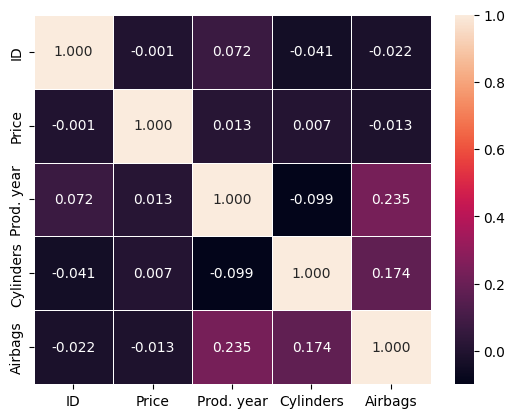

In [22]:
sns.heatmap(cor,annot=True,linewidths=.5,fmt='.3f')
plt.show()

In [23]:
data_object=data.select_dtypes(include='object')
data_object

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,NaN,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,NaN,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


In [24]:
data_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Levy              13215 non-null  object
 1   Manufacturer      18924 non-null  object
 2   Model             18924 non-null  object
 3   Category          18924 non-null  object
 4   Leather interior  18924 non-null  object
 5   Fuel type         18924 non-null  object
 6   Engine volume     18924 non-null  object
 7   Mileage           18924 non-null  object
 8   Gear box type     18924 non-null  object
 9   Drive wheels      18924 non-null  object
 10  Doors             18924 non-null  object
 11  Wheel             18924 non-null  object
 12  Color             18924 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [25]:
data_object=data.select_dtypes(include='object').columns
data_object

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

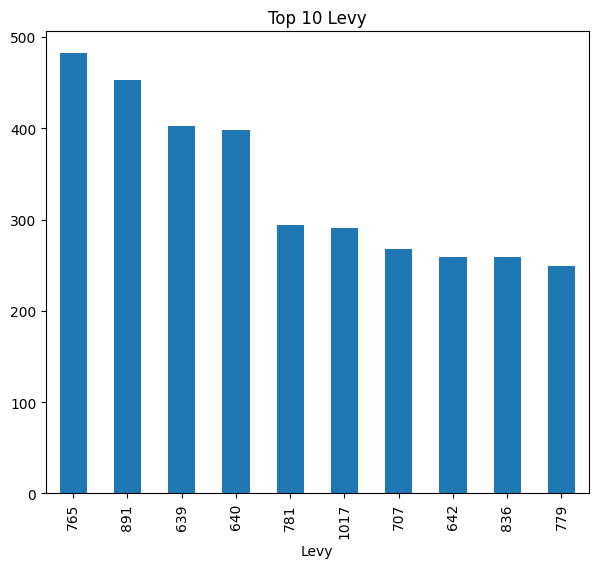

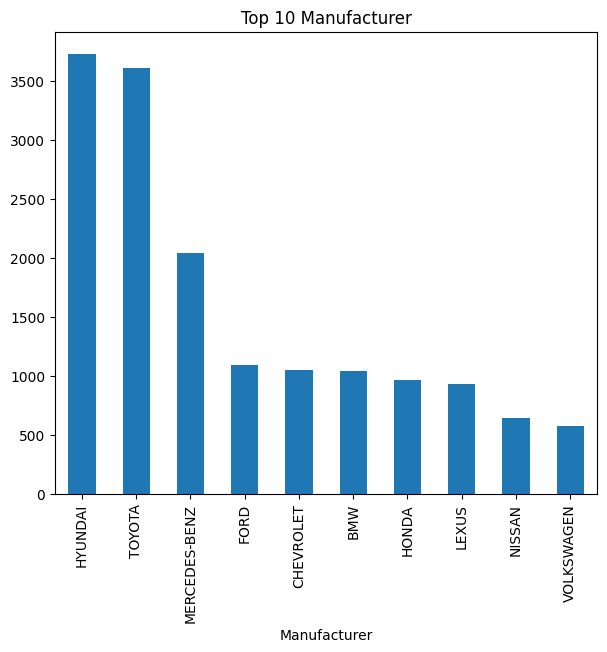

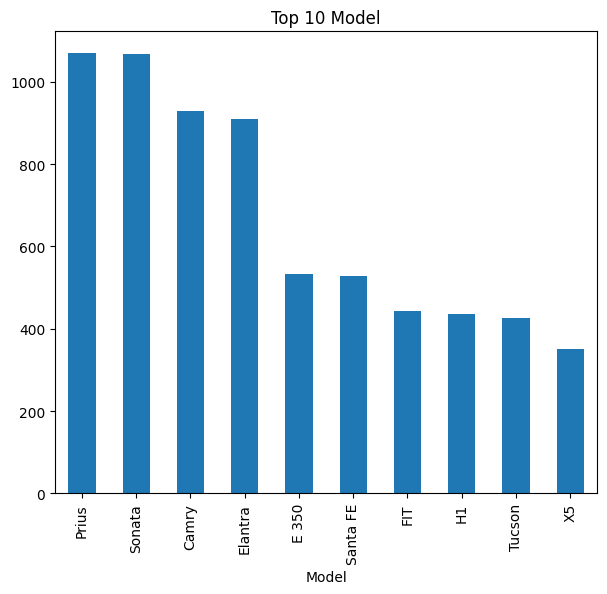

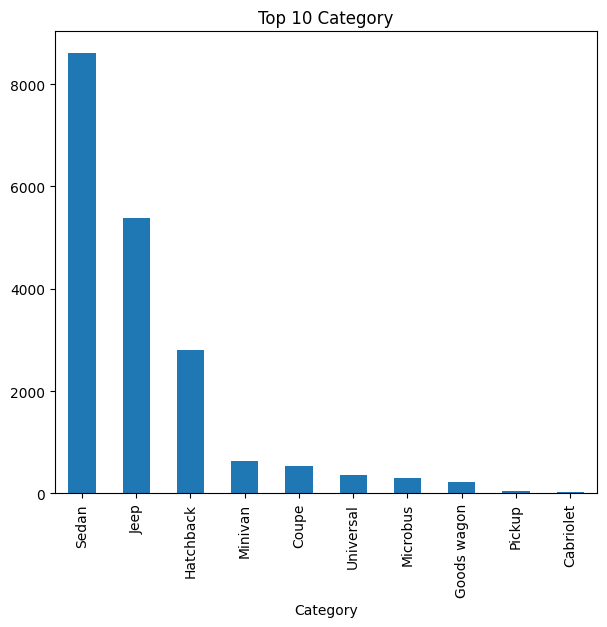

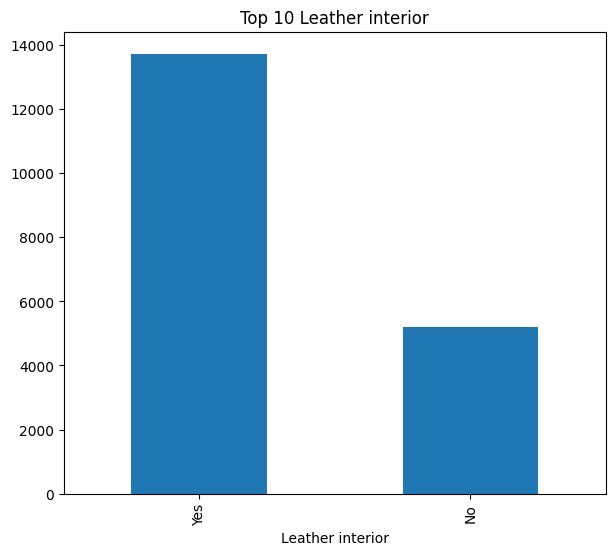

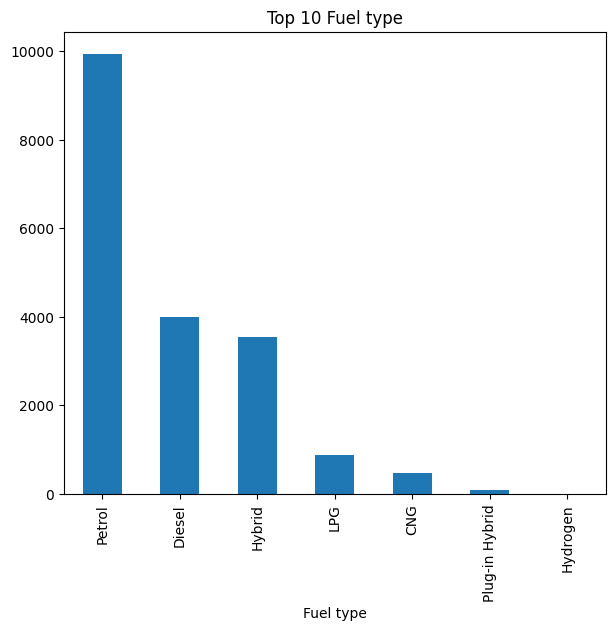

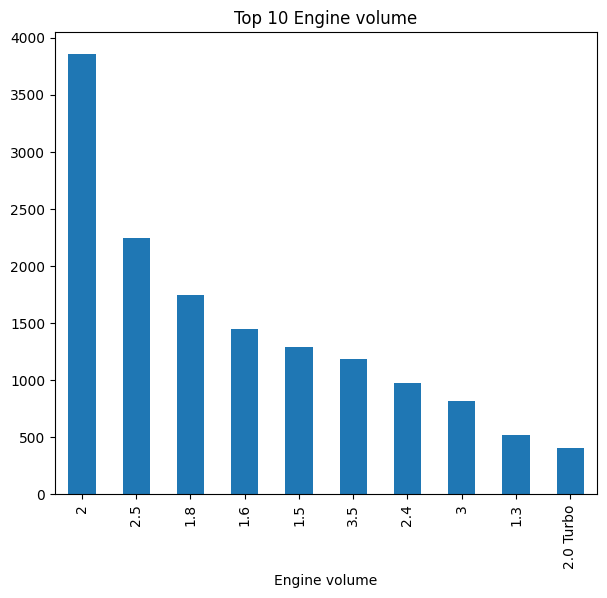

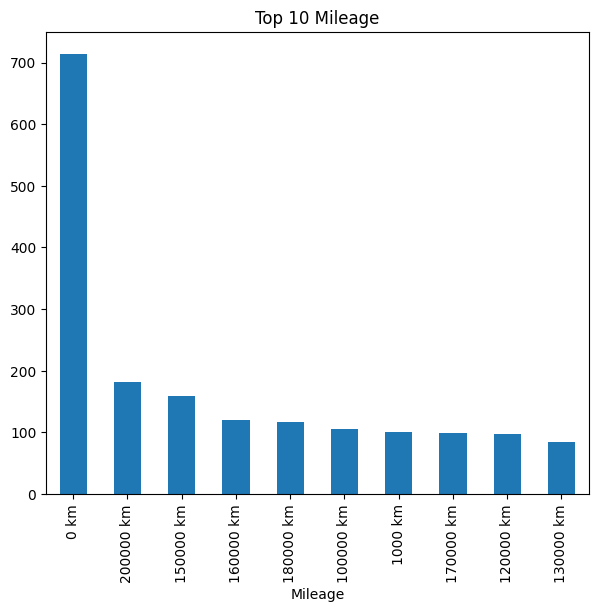

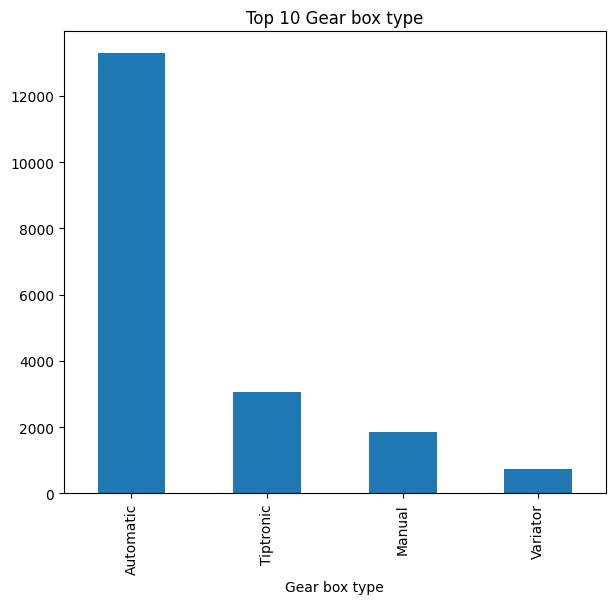

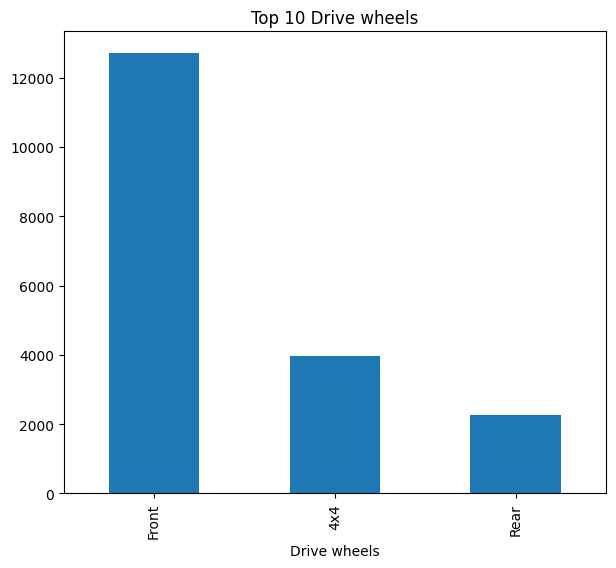

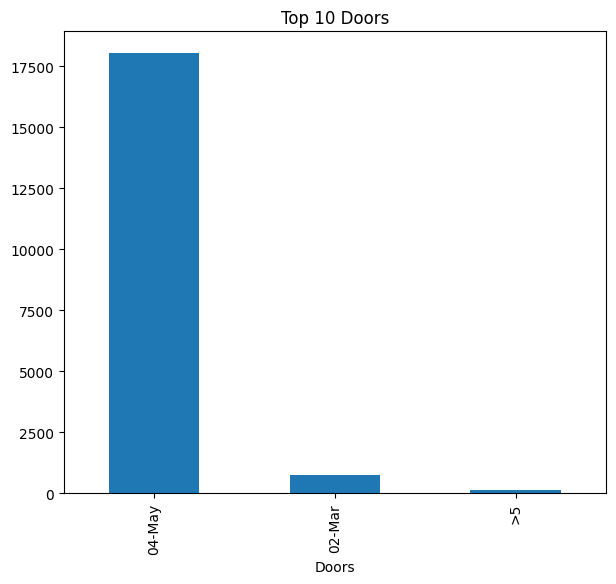

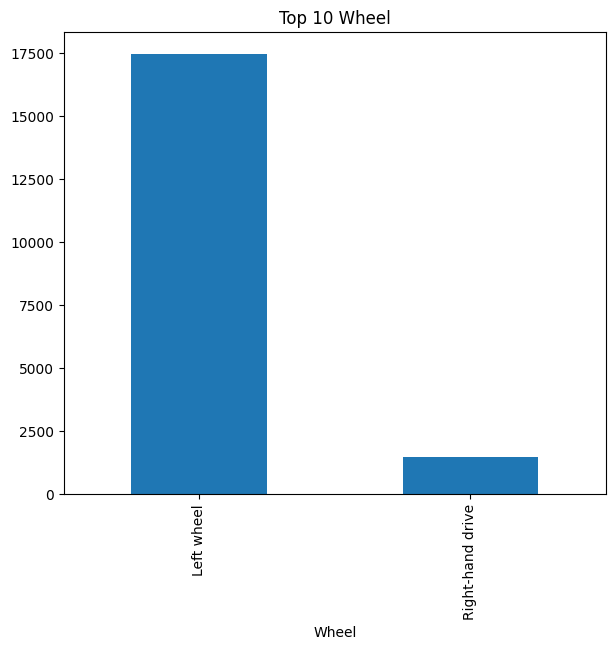

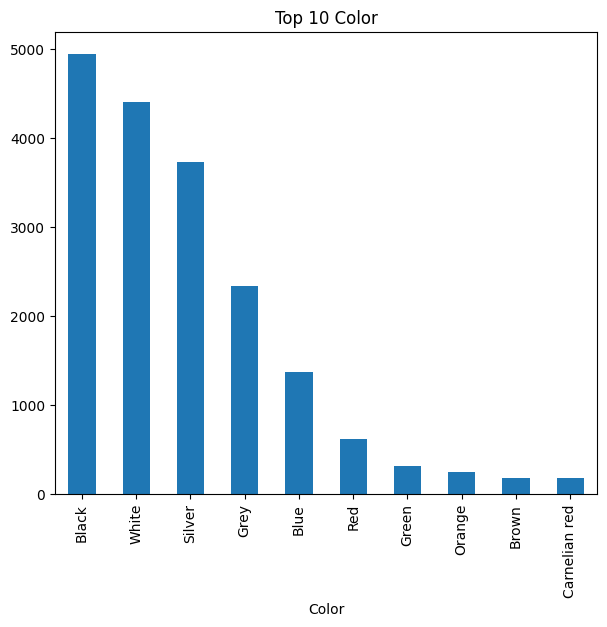

In [26]:
for col in data_object:
  plt.figure(figsize=(7,6))
  top_10=data[col].value_counts()[:10]
  top_10.plot(kind='bar')
  plt.title("Top 10"+ " "+col)
  plt.show()

# **3- Data PreProcessing**

In [27]:
data.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [28]:
data.drop(['ID' , 'Doors'],axis=1,inplace=True)

In [29]:
data.head(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,Left wheel,White,4
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,Left wheel,White,12
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,Left wheel,Grey,12
8,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,Left wheel,Black,12
9,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,Left wheel,Silver,12


# Date

In [30]:
import datetime
dtime=datetime.datetime.now()
dtime

datetime.datetime(2024, 9, 23, 12, 0, 13, 57722)

In [31]:
# create the columns name Age --> to calculate the age of the car and to chage the year to replace the age
data['Age'] = dtime.year - data['Prod. year']

In [32]:
data.head(10)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,Left wheel,White,4,8
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,Left wheel,White,12,14
7,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,Left wheel,Grey,12,11
8,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,Left wheel,Black,12,10
9,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,Left wheel,Silver,12,17


In [33]:
data=data.drop(['Prod. year'],axis=1)

# Levy

In [34]:
data.Levy.replace({'-','0'},inplace=True)
data['Levy'] = pd.to_numeric(data['Levy'])
data['Levy'] = data['Levy'].fillna(0)
data['Levy']=data['Levy'].astype(int)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  object 
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(1), int64(4), object(11)
memory us

# **Milage**

In [36]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags', 'Age'],
      dtype='object')

In [37]:
data['Mileage'].str.replace('km','')

,Mileage
0,186005
1,192000
2,200000
3,168966
4,91901
...,...
19232,300000
19233,161600
19234,116365
19235,51258


# **Engine Volume**

In [38]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [39]:
data['Engine volume']=data['Engine volume'].str.replace('Turbo','')

In [40]:
data['Engine volume']=data['Engine volume'].astype(float)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory us

# **Detect Outliers**

In [42]:
# في هذا الكود كل ما اعمل رن الارقام هتتغير لحد متصبح بصفر لانها تعتبر كل مره بتشتغل علي داتا جديده
data_nummeric=data.select_dtypes(exclude='object')
for col in data_nummeric:
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iqr=q3-q1
  low=q1-1.5*iqr
  high=q3+1.5*iqr
  outlier=((data_nummeric[col]>high)|(data_nummeric[col]<low)).sum()
  total=data_nummeric[col].shape[0]
  print(f"Total Outliers in {col} are : {outlier}.{round(100*(outlier)/total,2)}%")
  if outlier > 0 :
    data=data.loc[(data[col]<=high) & (data[col]>=low)]
  # print(col,":",outlier)
  # print(col,':',iqr)

Total Outliers in Price are : 1055.5.57%
Total Outliers in Levy are : 172.0.91%
Total Outliers in Engine volume are : 1358.7.18%
Total Outliers in Cylinders are : 4765.25.18%
Total Outliers in Airbags are : 0.0.0%
Total Outliers in Age are : 1777.9.39%


# **transform Data**

In [43]:
dobject=data.select_dtypes(include='object')
dnumeric=data.select_dtypes(exclude='object')

In [44]:
from sklearn.preprocessing import  LabelEncoder
la=LabelEncoder()

In [45]:
for i in range(0,dobject.shape[1]):
  dobject.iloc[:,i]=la.fit_transform(dobject.iloc[:,i])

In [46]:
print(dobject.dtypes)

Manufacturer        object
Model               object
Category            object
Leather interior    object
Fuel type           object
Mileage             object
Gear box type       object
Drive wheels        object
Wheel               object
Color               object
dtype: object


In [47]:
# تحويل كل الأعمدة اللي لسه object إلى int
for col in dobject.columns:
    dobject[col] = la.fit_transform(dobject[col])
    dobject[col] = dobject[col].astype(int)  # تحويل الأعمدة إلى int

In [48]:
data=pd.concat([dobject,dnumeric],axis=1)
data.head(10)

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Cylinders,Airbags,Age
2,16,347,3,0,4,2493,3,1,1,1,8467,0,1.3,4.0,2,18
3,12,334,4,1,2,1954,0,0,0,14,3607,862,2.5,4.0,0,13
4,16,347,3,1,4,5679,0,1,0,12,11726,446,1.3,4.0,4,10
5,17,683,4,1,1,1778,0,1,0,14,39493,891,2.0,4.0,4,8
6,43,616,3,1,2,3046,0,1,0,14,1803,761,1.8,4.0,12,14
7,17,697,8,1,4,2681,0,1,0,7,549,751,2.4,4.0,12,11
8,43,194,8,1,2,3787,0,1,0,1,1098,394,2.5,4.0,12,10
15,43,167,4,1,4,5123,0,1,0,14,549,1079,2.0,4.0,12,6
16,17,313,8,1,4,703,0,1,0,2,7683,810,1.8,4.0,12,8
17,17,313,8,1,4,4373,0,1,0,14,28382,810,1.8,4.0,4,8


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      12240 non-null  int64  
 1   Model             12240 non-null  int64  
 2   Category          12240 non-null  int64  
 3   Leather interior  12240 non-null  int64  
 4   Fuel type         12240 non-null  int64  
 5   Mileage           12240 non-null  int64  
 6   Gear box type     12240 non-null  int64  
 7   Drive wheels      12240 non-null  int64  
 8   Wheel             12240 non-null  int64  
 9   Color             12240 non-null  int64  
 10  Price             12240 non-null  int64  
 11  Levy              12240 non-null  int64  
 12  Engine volume     12240 non-null  float64
 13  Cylinders         12240 non-null  float64
 14  Airbags           12240 non-null  int64  
 15  Age               12240 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.6 MB

# **Model**

In [50]:
x=data.drop('Price',axis=1)
y=data['Price']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [53]:
Algorithm=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor',
           'XGBRegressor','SVR']
R2=[]
RMSE=[]

In [54]:
def models(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  r2=r2_score(y_test,y_pred)
  rmse=np.sqrt(mean_squared_error(y_test,y_pred))
  R2.append(r2)
  RMSE.append(rmse)
  model.score(x_test,y_test)
  print(f"The Score of The Model : {r2}")

In [55]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()
model5=XGBRegressor()
model6=SVR()

In [56]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)
models(model6)

The Score of The Model : 0.2092977797857113
The Score of The Model : 0.6397897172137763
The Score of The Model : 0.7747906993137551
The Score of The Model : 0.6633269975730662
The Score of The Model : 0.757577350123255
The Score of The Model : -0.0035827202334552943


In [57]:
df=pd.DataFrame({'Algorithm':Algorithm, 'R2_Score' : R2, 'RMSE':RMSE})
df

,Algorithm,R2_Score,RMSE
0,LinearRegression,0.209298,9896.477993
1,DecisionTreeRegressor,0.639790,6679.627396
2,RandomForestRegressor,0.774791,5281.622354
3,GradientBoostingRegressor,0.663327,6457.706909
4,XGBRegressor,0.757577,5479.750452
5,SVR,-0.003583,11149.381387


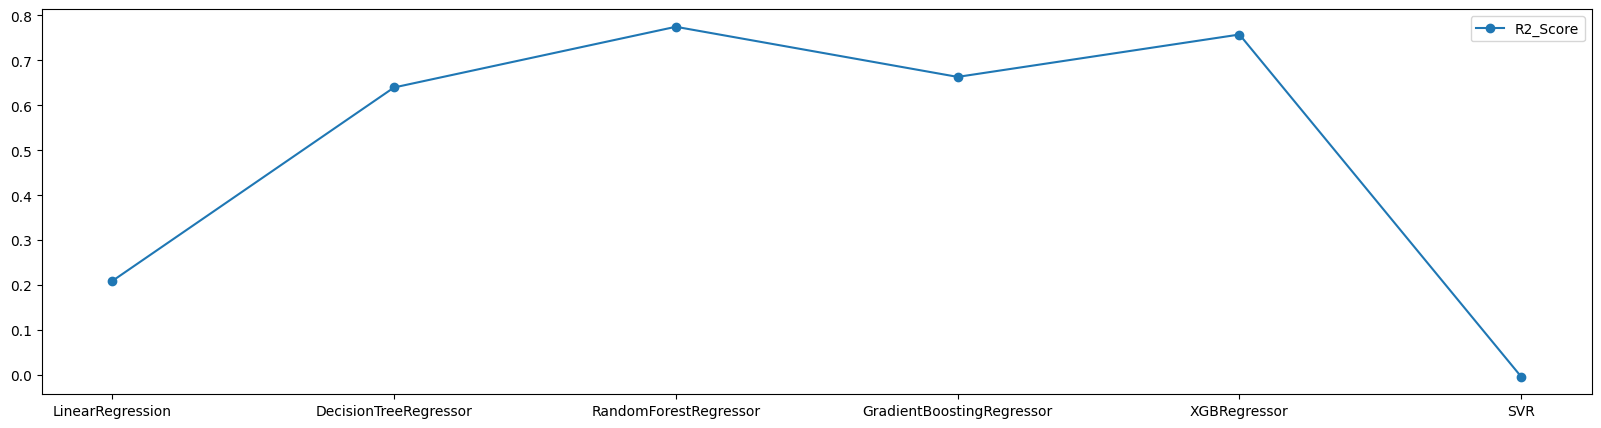

In [58]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.R2_Score,label='R2_Score',marker='o')
plt.legend()
plt.show()

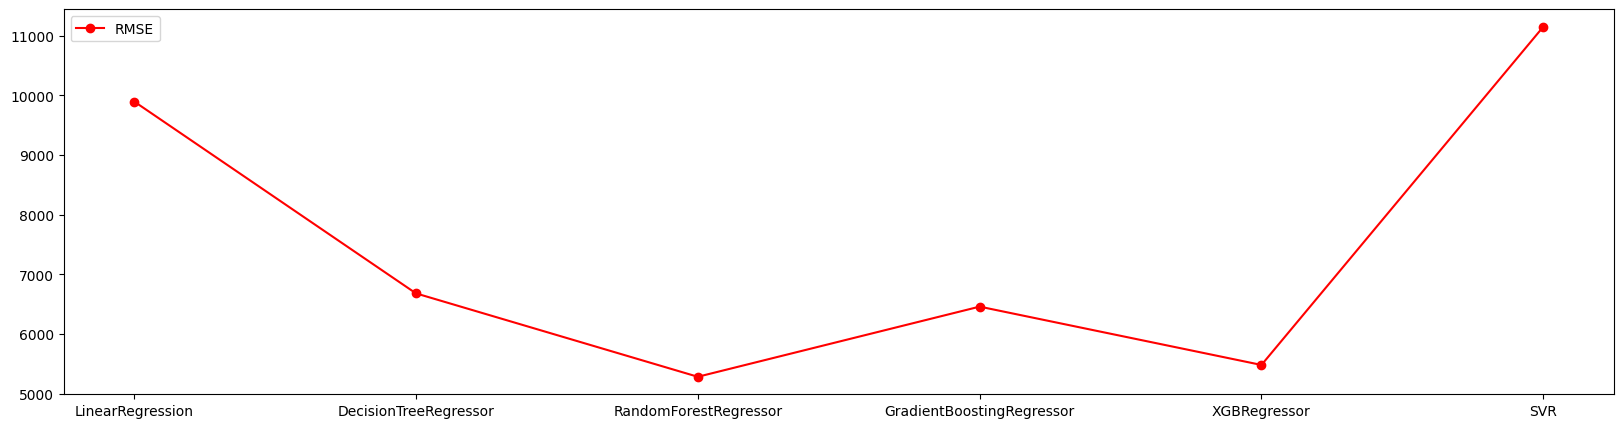

In [59]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.RMSE,label='RMSE',marker='o',c='r')
plt.legend()
plt.show()

# **Using My Model To Predict New Data**

In [60]:
import pickle

In [61]:
file_name='car_price_prediction.sav'

In [65]:
pickle.dump(model3,open(file_name,'wb'))